## Trending baby names

### Load dataset

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
baby_names = pd.read_csv("https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/ddi_baby_names.csv")
baby_names.head()

,year,name,gender,count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


### Number of unique names split by genders

In [8]:
# Unique names either gender.
baby_names["name"].nunique()


98400

In [9]:
# Unique names for male.
baby_names[baby_names["gender"] == "M"]["name"].nunique()

41475

In [10]:
# Unique names for female.
baby_names[baby_names["gender"] == "F"]["name"].nunique()

67698

In [11]:
# Unique names for gender neutral.
unique_names = baby_names.pivot_table(index="name", columns="gender", values="count", aggfunc=np.sum).dropna()
unique_names.index.nunique()

10773

### Top 10 most popular male and female names along with their associated counts

In [21]:
# Male names
male_top_10 = baby_names[baby_names["gender"] == "M"]
male_top_10 = male_top_10[["name","count"]].groupby("name").sum()
male_top_10.sort_values("count",ascending=False).head(10)

,count
name,
James,5164280
John,5124817
Robert,4820129
Michael,4362731
William,4117369
David,3621322
Joseph,2613304
Richard,2565301
Charles,2392779


In [20]:
# Female names
female_top_10 = baby_names[baby_names["gender"] == "F"]
female_top_10 = female_top_10[["name","count"]].groupby("name").sum()
female_top_10.sort_values("count",ascending=False).head(10)

,count
name,
Mary,4125675
Elizabeth,1638349
Patricia,1572016
Jennifer,1467207
Linda,1452668
Barbara,1434397
Margaret,1248985
Susan,1121703
Dorothy,1107635


In [36]:
# Top 10 names regardless genders
both_top_10 = baby_names[["name","count"]].groupby("name").sum()
both_top_10.sort_values("count",ascending=False).head(10)

,count
name,
James,5187679
John,5146508
Robert,4840228
Michael,4384463
Mary,4140840
William,4133327
David,3634229
Joseph,2623958
Richard,2574832


In [22]:
# count by year
both_df = baby_names.groupby("year").sum()
male_df = baby_names[baby_names["gender"] == "M"].groupby("year").sum()
female_df = baby_names[baby_names["gender"] == "F"].groupby("year").sum()

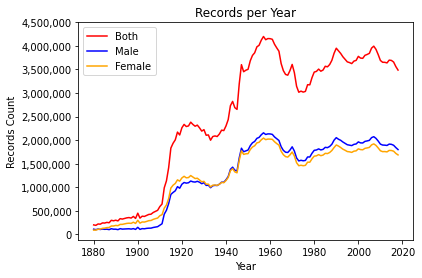

In [31]:
plt.plot(both_df, label="Both", color="red")
plt.plot(male_df, label="Male", color="blue")
plt.plot(female_df, label="Female", color="orange")

yticks_labels = ["{:,}".format(i) for i in range(0, 4500000+1, 500000)]
plt.yticks(np.arange(0, 4500000+1, 500000), yticks_labels)

plt.legend()
plt.grid(False)
plt.xlabel("Year")
plt.ylabel("Records Count")
plt.title("Records per Year")
plt.show()